# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [7]:
! git clone https://github.com/pabloisaiahs/wrangling.git

Cloning into 'wrangling'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 72 (delta 14), reused 7 (delta 7), pack-reused 39 (from 1)
Receiving objects: 100% (72/72), 14.58 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [71]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
from IPython.display import display, Markdown

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [52]:
# Airbnb Price Cleaning
airbnb_data = pd.read_csv('airbnb_hw.csv')
airbnb_data['clean_price'] = airbnb_data['Price'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)
print(f"Airbnb Price Missing Values: {airbnb_data['clean_price'].isnull().sum()}")

# Police Injury Data Cleaning
police_data = pd.read_csv('mn_police_use_of_force.csv')
missing_rate = police_data['subject_injury'].isna().mean()
print(f"Police Injury Data Missing Rate {missing_rate:.2%}")

police_data['injury_status'] = police_data['subject_injury'].fillna('Unknown')
injury_by_force = pd.crosstab(police_data['injury_status'], police_data['force_type'])
print("\nInjury Status by Force Type")
print(tabulate(injury_by_force, headers='keys', tablefmt='psql'))

# Pretrial Release Data
pretrial_url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial_data = pd.read_csv(pretrial_url, low_memory=False)

# Clean Release
pretrial_data['release_status'] = pretrial_data['WhetherDefendantWasReleasedPretrial'].replace('', np.nan)

# Clean Sentence
pretrial_data['clean_sentence'] = pd.to_numeric(
    pretrial_data['ImposedSentenceAllChargeInContactEvent'].replace(r'^\s*$', np.nan, regex=True),
    errors='coerce'
)

def calculate_missing_rate(group):
    return group.isna().mean()

missing_sentence = pretrial_data.groupby('SentenceTypeAllChargesAtConvictionInContactEvent')['clean_sentence'].agg(calculate_missing_rate)
print("\nMissing Sentence Rates")
print(tabulate(missing_sentence.reset_index(), headers=['Sentence Type', 'Missing Rate'], tablefmt='psql'))


Airbnb Price Missing Values: 0
Police Injury Data Missing Rate 76.19%

Injury Status by Force Type
+-----------------+---------+----------------+---------------------+-----------+---------------------+---------------------+---------------+--------------------------+-------------------------------+------------------+---------+
| injury_status   |   Baton |   Bodily Force |   Chemical Irritant |   Firearm |   Gun Point Display |   Improvised Weapon |   Less Lethal |   Less Lethal Projectile |   Maximal Restraint Technique |   Police K9 Bite |   Taser |
|-----------------+---------+----------------+---------------------+-----------+---------------------+---------------------+---------------+--------------------------+-------------------------------+------------------+---------|
| No              |       0 |           1093 |                 131 |         2 |                  33 |                  34 |             0 |                        1 |                             0 |               

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

attack_year
1940.0    24
1941.0    27
1942.0    41
1943.0    28
1944.0    31
dtype: int64
attack_year
2022.0     98
2023.0    109
2024.0     49
2025.0      6
2026.0      1
dtype: int64
Shark attack frequency has risen since 1940.
victim_sex
M    4299
F     706
Name: count, dtype: int64
Percentage of Male Victims: 85.89%
Percentage of Unprovoked Attacks: 74.29%


victim_sex,F,M
attack_type,,
Provoked,28,446
Unknown,78,540
Unprovoked,600,3313


Total Attacks on Females: 706
Unprovoked Attacks on Females: 600
Percentage of Unprovoked Attacks on Females: 84.99%
Total Attacks on Males: 4299
Unprovoked Attacks on Males: 3313
Percentage of Unprovoked Attacks on Males: 77.06%


**> The data suggests a higher likelihood of unprovoked attacks on women compared to men.**

is_fatal,N,Unknown,Y
attack_type,,,
Provoked,496,9,13
Unknown,366,399,120
Unprovoked,3325,51,679


Total Fatal Attacks: 812
Fatal Unprovoked Attacks: 679
Percentage of Fatal Attacks that were Unprovoked: 83.62%
Fatal Provoked Attacks: 13
Percentage of Fatal Attacks that were Provoked: 1.60%


**> The data indicates that unprovoked attacks have a higher fatality rate than provoked attacks.**

victim_sex,F,M
is_fatal,,
N,561,3328
Unknown,58,322
Y,87,649


Total Fatal Attacks: 736
Fatal Attacks on Males: 649
Percentage of Fatal Attacks on Males: 88.18%
Fatal Attacks on Females: 87
Percentage of Fatal Attacks on Females: 11.82%


**> The data suggests a higher fatality rate in attacks on females compared to males.**

**> Sharks likely don't have intentional preferences. Environmental and situational factors may contribute to these statistics.**

Percentage of attacks attributed to White Sharks: 8.52%


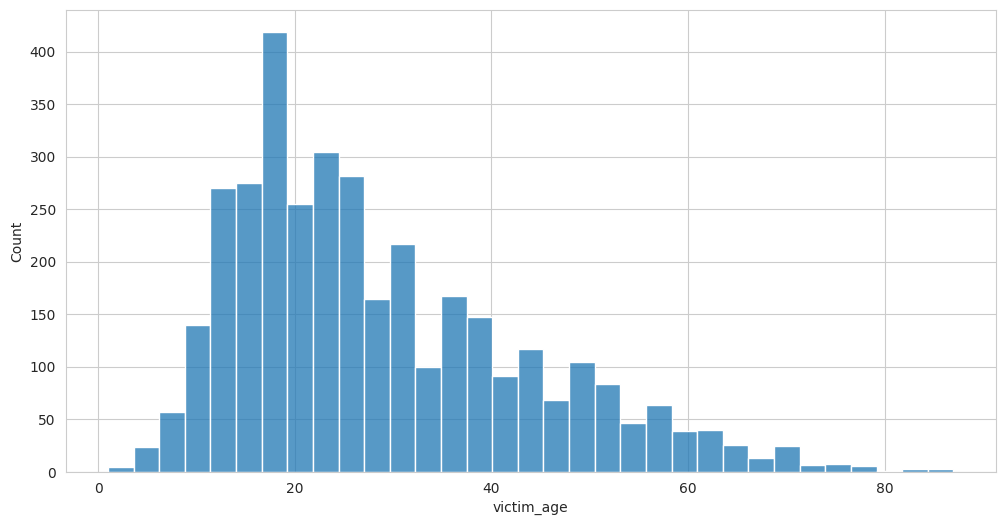

In [72]:
# Import shark attack dataset
shark_data = pd.read_excel("shark_data.xls")
shark_df = pd.DataFrame(shark_data)

# Remove unnecessary columns and standardize year data
shark_df = shark_df.drop(columns=["pdf", "href formula", "href", "Case Number", "Case Number.1", "original order", "Unnamed: 21", "Unnamed: 22"])
shark_df["attack_year"] = pd.to_numeric(shark_df["Year"]).dropna().round().astype(int)

# Limit analysis to attacks from 1940 onwards
shark_df = shark_df[shark_df["attack_year"] >= 1940]

# Aggregate attacks by year
yearly_attacks = shark_df.groupby("attack_year").size()

print(yearly_attacks.head())
print(yearly_attacks.tail())
print("Shark attack frequency has risen since 1940.")

# Process age data and create age distribution visualization
shark_df["victim_age"] = pd.to_numeric(shark_df["Age"], errors="coerce").dropna().astype(int)
sns.histplot(shark_df["victim_age"])

# Analyze gender distribution of victims
shark_df["victim_sex"] = shark_df["Sex"].replace({
    "lli": np.nan,
    "M x 2": "M",
    " M": "M",
    "M ": "M"
    })

print(shark_df["victim_sex"].value_counts())
male_count = (shark_df["victim_sex"] == "M").sum()
female_count = (shark_df["victim_sex"] == "F").sum()
print(f"Percentage of Male Victims: {male_count/(male_count+female_count):.2%}")

# Categorize attacks as Provoked, Unprovoked, or Unknown
shark_df["attack_type"] = shark_df["Type"].replace({
    " Provoked": "Provoked",
    "Questionable": "Unknown",
    "?": "Unknown",
    "Unconfirmed": "Unknown",
    "Unverified": "Unknown",
    "Invalid": "Unknown",
    "Under investigation": "Unknown",
    "Boat": "Unknown",
    "Watercraft": "Unknown",
    "Sea Disaster": "Unknown"
}).fillna("Unknown")
shark_df["attack_type"].unique()

unprovoked_count = (shark_df["attack_type"] == "Unprovoked").sum()
provoked_count = (shark_df["attack_type"] == "Provoked").sum()
unknown_count = (shark_df["attack_type"] == "Unknown").sum()

unprovoked_proportion = unprovoked_count/(unprovoked_count+provoked_count+unknown_count)
print(f"Percentage of Unprovoked Attacks: {unprovoked_proportion:.2%}")

# Standardize fatality data
shark_df["is_fatal"] = shark_df["Fatal Y/N"].replace({
    "F": "Unknown",
    "M": "Unknown",
    "n": "N",
    "Nq": "N",
    "UNKNOWN": "Unknown",
    2017: "Unknown",
    "Y x 2" : "Y",
    " N" : "N"
 }).fillna("Unknown")

# Analyze relationship between attack type and victim gender
type_sex_crosstab = pd.crosstab(shark_df["attack_type"], shark_df["victim_sex"])
display(type_sex_crosstab)

# Calculate statistics for female victims
female_attacks_total = type_sex_crosstab["F"].sum()
female_unprovoked_attacks = type_sex_crosstab.loc["Unprovoked", "F"]
female_unprovoked_prob = female_unprovoked_attacks / female_attacks_total

print("Total Attacks on Females:", female_attacks_total)
print("Unprovoked Attacks on Females:", female_unprovoked_attacks)
print(f"Percentage of Unprovoked Attacks on Females: {female_unprovoked_prob:.2%}")

# Calculate statistics for male victims
male_attacks_total = type_sex_crosstab["M"].sum()
male_unprovoked_attacks = type_sex_crosstab.loc["Unprovoked", "M"]
male_unprovoked_prob = male_unprovoked_attacks / male_attacks_total

print("Total Attacks on Males:", male_attacks_total)
print("Unprovoked Attacks on Males:", male_unprovoked_attacks)
print(f"Percentage of Unprovoked Attacks on Males: {male_unprovoked_prob:.2%}")
display(Markdown("**> The data suggests a higher likelihood of unprovoked attacks on women compared to men.**"))

type_fatal_crosstab = pd.crosstab(shark_df["attack_type"], shark_df["is_fatal"])
display(type_fatal_crosstab)

# Analyze fatality rates for different attack types
fatal_attacks_total = type_fatal_crosstab["Y"].sum()
unprovoked_fatal_count = type_fatal_crosstab.loc["Unprovoked", "Y"]
unprovoked_fatal_prob = unprovoked_fatal_count / fatal_attacks_total

print("Total Fatal Attacks:", fatal_attacks_total)
print("Fatal Unprovoked Attacks:", unprovoked_fatal_count)
print(f"Percentage of Fatal Attacks that were Unprovoked: {unprovoked_fatal_prob:.2%}")

provoked_fatal_count = type_fatal_crosstab.loc["Provoked", "Y"]
provoked_fatal_prob = provoked_fatal_count / fatal_attacks_total

print("Fatal Provoked Attacks:", provoked_fatal_count)
print(f"Percentage of Fatal Attacks that were Provoked: {provoked_fatal_prob:.2%}")
display(Markdown("**> The data indicates that unprovoked attacks have a higher fatality rate than provoked attacks.**"))

fatal_sex_crosstab = pd.crosstab(shark_df["is_fatal"], shark_df["victim_sex"])
display(fatal_sex_crosstab)

# Analyze fatality rates by gender
fatal_attacks_total = fatal_sex_crosstab.loc["Y"].sum()
male_fatal_count = fatal_sex_crosstab.loc["Y", "M"]
male_fatal_prob = male_fatal_count / fatal_attacks_total

print("Total Fatal Attacks:", fatal_attacks_total)
print("Fatal Attacks on Males:", male_fatal_count)
print(f"Percentage of Fatal Attacks on Males: {male_fatal_prob:.2%}")

female_fatal_count = fatal_sex_crosstab.loc["Y", "F"]
female_fatal_prob = female_fatal_count / fatal_attacks_total

print("Fatal Attacks on Females:", female_fatal_count)
print(f"Percentage of Fatal Attacks on Females: {female_fatal_prob:.2%}")
display(Markdown("**> The data suggests a higher fatality rate in attacks on females compared to males.**"))
display(Markdown("**> Sharks likely don't have intentional preferences. Environmental and situational factors may contribute to these statistics.**"))

# Analyze the prevalence of white shark attacks

shark_df.rename(columns={"Species ": "shark_species"}, inplace=True)

shark_df["shark_species"] = shark_df["shark_species"].astype(str).str.split().str.get(0)
shark_df["shark_species"] = shark_df["shark_species"].replace("white", "White")

white_shark_proportion = (shark_df["shark_species"] == "White").sum() / species_type_crosstab["Total"].sum()

print(f"Percentage of attacks attributed to White Sharks: {white_shark_proportion:.2%}")


**> REMOVED Q3<**

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. **How did the most recent US Census gather data on race?**
*The most recent US Census gather data on race was in 2020, in which they used combined questions for race and ethnicity. One questions asked was about Hispanic or Latino origin and the other one was just about race. They collected responses by mail, phone, and also through the internet and sending census workers to people.*
2. **Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?**
*We gather the data to make sure that there's fair representation and to also enforce civil rights laws on top of monitoring discrimation. Overall it helps with policy making decisions and research. The quality matters because the more accurate it is, the more fair we can be.*
3. **Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?**
*I think the census is as good as it can be for something with such a large volume of data. They could definitely do better by reaching out to all publicly available phone numbers, but Ia lso feel like the US is so diverse they should add more combined questions for race and ethnicities that people identify with.*
4. **How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.**
*Sex and gender aren't really a priority in the Census, but they do ask individuals if they are male, female, or any other gender identity. I believe that lack of this information limits what policies we can enact or what trends we can find among race, ethnitices, and genders. Ultimately it would be better to give more options in the census.*
5. **When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?**
*People can be super diverse, and with that comes a bunch of data that at times can be ultimately subjective for certain things. Having such a diverse dataset can lead to it being harder to clean or trying to fill in certain varaibles for missing data. I feel like good practicies that can be adopted are just adding more options to the census with definitions that people feel like they mostly identify with.*
6. **Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?**
*An algorithm that imputes values for these variables can easily lead to bias in the trianing data. It's more than likely at risk of misclassification and sterotyping. There's also ethical conserns about identities being assigned that one wouldnt identify with. Overall it would be a mess and is just a bias assumption.*
